In [2]:
import allensdk
import pyabf
import matplotlib.pyplot as plt


In [27]:
print(abf.channelList)
print(abf.headerText) # display header information in the console


[0, 1]

### ABF Class Methods ###
abf.launchInClampFit()
abf.saveABF1()
abf.setSweep()
abf.sweepD()

### ABF Class Variables ###
abfDateTime = 2015-10-08 16:32:37.968000
abfDateTimeString = 2015-10-08T16:32:37.968
abfFileComment =
abfFilePath = /external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/15o08038.abf
abfFolderPath = /external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data
abfID = 15o08038
abfVersion = {'major': 1, 'minor': 8, 'bugfix': 3, 'build': 0}
abfVersionString = 1.8.3.0
adcNames = ['Iclamp', 'Input07']
adcUnits = ['mV', 'mV']
channelCount = 2
channelList = [0, 1]
creator = Clampex 9.2.0.9
creatorVersion = {'major': 9, 'minor': 2, 'bugfix': 0, 'build': 9}
creatorVersionString = 9.2.0.9
dacNames = ['Cmd 0', 'Cmd 1', 'AO #2', 'AO #3']
dacUnits = ['pA', 'pA', 'mV', 'mV']
data = [[-2.7936 -2.7939 -2.7924 ... -2.7319 -2.7332 -2.7328]
[ 

/nethome/kcni/stripathy/.local/lib/python3.6/site-packages/pyabf/abfHeaderDisplay.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value == "~SECTION~":
/nethome/kcni/stripathy/.local/lib/python3.6/site-packages/pyabf/abfHeaderDisplay.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif value == "~DOCS~":


In [49]:
#fn = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/19320041.abf'

fn = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/13d02049.abf'
# 2016_02_04_0042.abf - example from cluster 3 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
abf.setSweep(1, channel= 0)
print(abf.sweepY) # displays sweep data (ADC)
print(abf.sweepX) # displays sweep times (seconds)
print(abf.sweepC) # displays command waveform (DAC)
#plt.figure(figsize=(8, 5))
#plt.plot(abf.sweepX, abf.sweepY)
#plt.show()
for i in [16]:
    abf.setSweep(i, channel=2)
    plt.plot(abf.sweepX, abf.sweepY/5, alpha=.5, label="sweep %d" % (i))
    #plt.plot(abf.sweepX, abf.sweepY/5, alpha=.5, label="sweep %d" % (i))
    plt.legend()
    plt.ax
    
plt.show()

[-2.9062 -2.9041 -2.9034 ... -2.926  -2.926  -2.9263]
[0.     0.0001 0.0002 ... 4.152  4.1521 4.1522]
[0. 0. 0. ... 0. 0. 0.]


ValueError: Sweep 16 not available (must be 0 - 14)

/opt/miniconda3/envs/jupyterhub/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


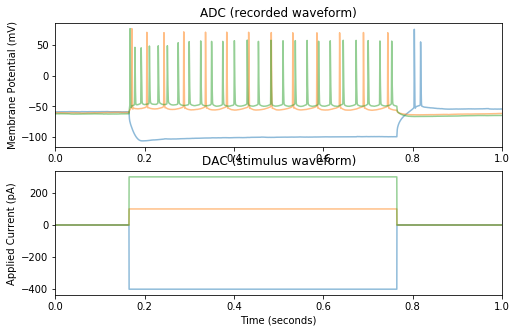

In [77]:
fn = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/13d02049.abf'
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)

sweep_num = 0
sweep_plot_list = [0, 10, 14]

stim_channel_num = 0
stim_gain = 1000
stim_end = 1

fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=stim_channel_num)

    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*20, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

/opt/miniconda3/envs/jupyterhub/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


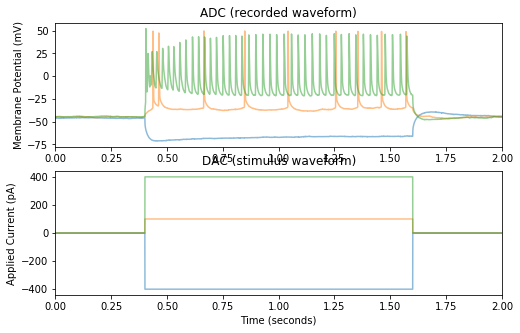

In [163]:
file_base_path = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/'
curr_file = '2016_02_04_0042.abf'
fn = file_base_path + curr_file
# 2016_02_04_0042.abf - example from cluster 4 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
stim_channel_num = 1
response_chan_num = 0
stim_gain = 1
response_gain = 20

stim_end = 2

sweep_num = 0
sweep_plot_list = [0, 10, 16]
fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    abf.setSweep(sweep_num, channel=stim_channel_num)
    abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

/opt/miniconda3/envs/jupyterhub/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


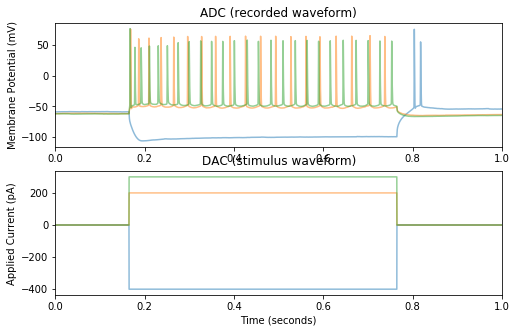

In [139]:
# example from cluster 1 - regular spiking
file_base_path = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/'
curr_file = '13d02049.abf'
fn = file_base_path + curr_file

# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
stim_channel_num = 0
response_chan_num = 0
stim_gain = 1000

stim_end = 1

sweep_num = 0
sweep_plot_list = [0, 12, 14]
fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    abf.setSweep(sweep_num, channel=stim_channel_num)
    #abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

/opt/miniconda3/envs/jupyterhub/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


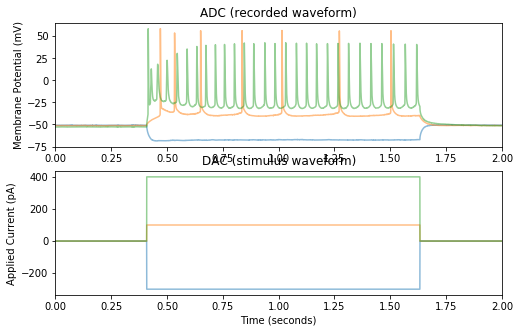

In [159]:
# example from cluster 2 - seems very similar to burst firing cluster
file_base_path = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/'
curr_file = '15o08032.abf'
fn = file_base_path + curr_file
# 2016_02_04_0042.abf - example from cluster 4 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
stim_channel_num = 1
response_chan_num = 0
stim_gain = 1
response_gain = 20

stim_end = 2

sweep_num = 0
sweep_plot_list = [2, 10, 16]
fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    abf.setSweep(sweep_num, channel=stim_channel_num)
    abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

/opt/miniconda3/envs/jupyterhub/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


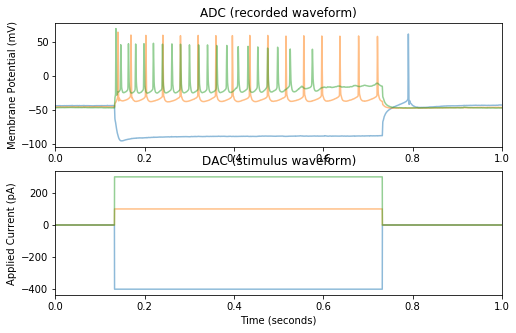

In [161]:
# example from cluster 3 
file_base_path = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/'
curr_file = '13n21007.abf'

fn = file_base_path + curr_file
# 2016_02_04_0042.abf - example from cluster 4 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
stim_channel_num = 0
response_chan_num = 0
stim_gain = 1000
response_gain = 40

stim_end = 1

sweep_num = 0
sweep_plot_list = [0, 10, 14]
fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    abf.setSweep(sweep_num, channel=stim_channel_num)
    #abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

In [164]:
print(abf.headerText)


### ABF Class Methods ###
abf.launchInClampFit()
abf.saveABF1()
abf.setSweep()
abf.sweepD()

### ABF Class Variables ###
abfDateTime = 2016-02-04 19:08:45.265000
abfDateTimeString = 2016-02-04T19:08:45.265
abfFileComment =
abfFilePath = /external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/2016_02_04_0042.abf
abfFolderPath = /external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data
abfID = 2016_02_04_0042
abfVersion = {'major': 1, 'minor': 8, 'bugfix': 3, 'build': 0}
abfVersionString = 1.8.3.0
adcNames = ['Iclamp', 'Input07']
adcUnits = ['mV', 'mV']
channelCount = 2
channelList = [0, 1]
creator = Clampex 9.2.0.9
creatorVersion = {'major': 9, 'minor': 2, 'bugfix': 0, 'build': 9}
creatorVersionString = 9.2.0.9
dacNames = ['Cmd 0', 'Cmd 1', 'AO #2', 'AO #3']
dacUnits = ['V', 'pA', 'mV', 'mV']
data = [[-2.3074 -2.305  -2.3062 ... -2.1747 -2.1744 -2.17

/nethome/kcni/stripathy/.local/lib/python3.6/site-packages/pyabf/abfHeaderDisplay.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value == "~SECTION~":
/nethome/kcni/stripathy/.local/lib/python3.6/site-packages/pyabf/abfHeaderDisplay.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif value == "~DOCS~":
